In [13]:
import mglearn

import graphviz

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt
import numpy as np

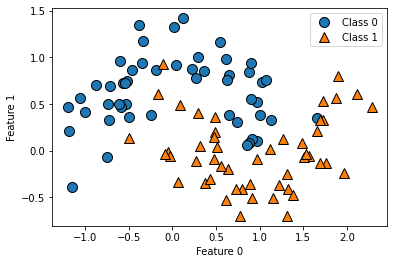

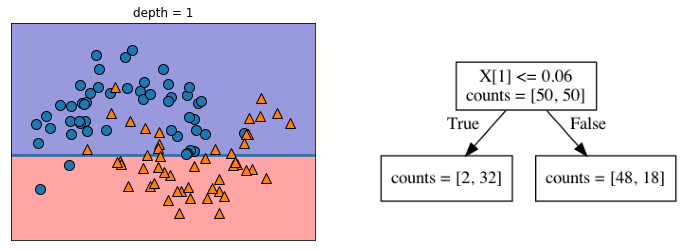

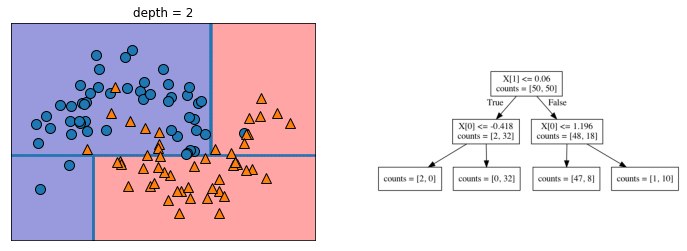

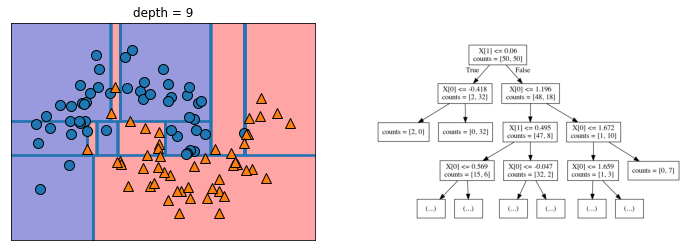

In [2]:
mglearn.plots.plot_tree_progressive()

In [3]:
cancer = datasets.load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=42
)

In [5]:
tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(X_train, y_train)

print(f'Train score: {tree.score(X_train, y_train)}')
print(f'Test score: {tree.score(X_test, y_test)}')

Train score: 0.9953051643192489
Test score: 0.951048951048951


In [7]:
export_graphviz(
    tree,
    out_file='tree.dot',
    class_names=['maligant', 'benign'],
    feature_names=cancer.feature_names,
    impurity=False,
    filled=True
)

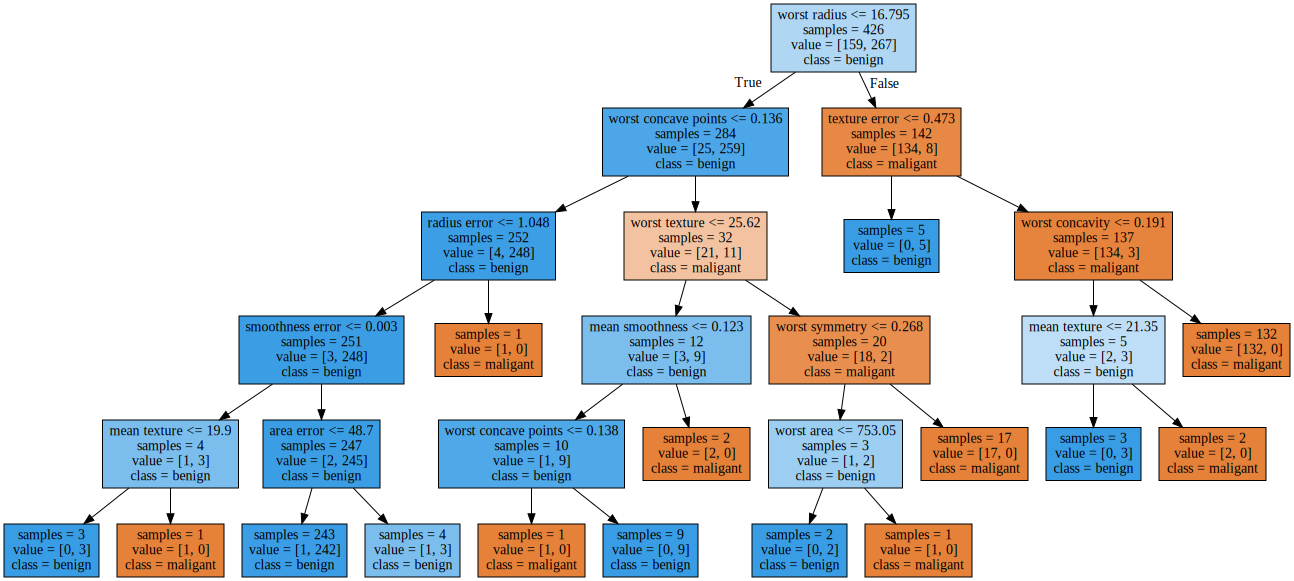

In [10]:
dot_graph = None

with open('tree.dot', 'r') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [11]:
tree.feature_importances_

array([0.        , 0.01991644, 0.        , 0.        , 0.01378831,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0099313 , 0.04713547, 0.        , 0.00243002, 0.00235257,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.70786451, 0.03236422, 0.        , 0.00680904, 0.        ,
       0.        , 0.01771345, 0.1281193 , 0.01157537, 0.        ])

Text(0, 0.5, 'Feature')

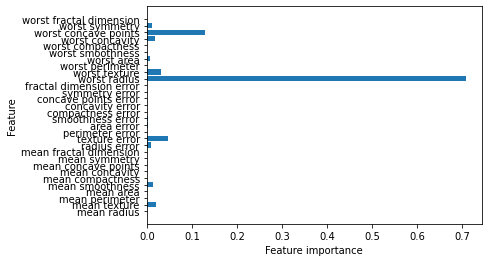

In [14]:
features = cancer.data.shape[1]

plt.barh(range(features), tree.feature_importances_, align='center')
plt.yticks(np.arange(features), cancer.feature_names)
plt.xlabel('Feature importance')
plt.ylabel('Feature')

Feature importances: [0. 1.]


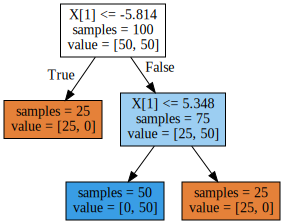

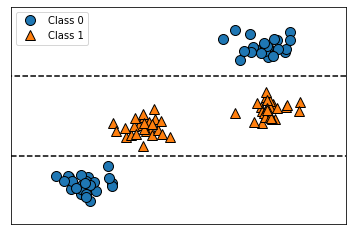

In [15]:
mglearn.plots.plot_tree_not_monotone()